https://mp.weixin.qq.com/s/f3NcQgv-AQSG-lMUT0ihlA

* timestamp: 特定的时刻
* period: 固定时期,如2007年1月,或 2010年全年
* interval: 时间间隔,由起始和结束时间戳表示.period可以被看做interval的特例


# 时间序列生成

## 字符串序列转换为时间序列
pandas通常用于成组日期, pd.to_datetime可以解析多种不同的日期表示形式

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

In [3]:
s = ['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06']

In [4]:
pd.to_datetime(s)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq=None)

In [5]:
s = ['20110203', '2011-02-13', '2011/02/23']
pd.to_datetime(s)

DatetimeIndex(['2011-02-03', '2011-02-13', '2011-02-23'], dtype='datetime64[ns]', freq=None)

可以处理缺失值

In [6]:
s = ['20110203', None, '2011/02/23']
pd.to_datetime(s)

DatetimeIndex(['2011-02-03', 'NaT', '2011-02-23'], dtype='datetime64[ns]', freq=None)

## datetime index

In [6]:
from datetime import datetime

In [7]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [8]:
pd.to_datetime(dates)

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

## 按要求生成时间序列
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

In [9]:
pd.date_range('2011-01-02', '2011-01-05')

DatetimeIndex(['2011-01-02', '2011-01-03', '2011-01-04', '2011-01-05'], dtype='datetime64[ns]', freq='D')

### freq
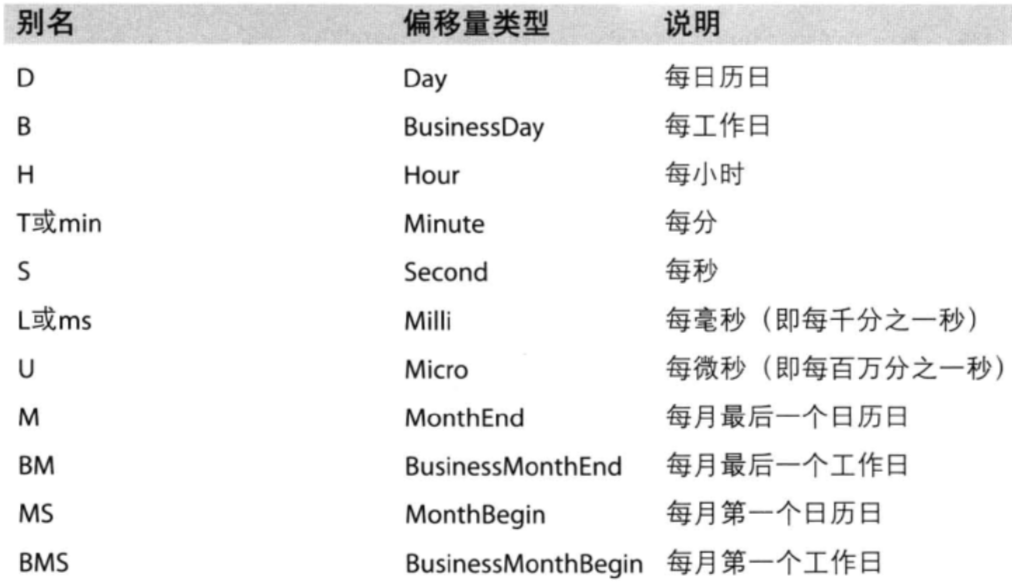

In [9]:
pd.date_range('20130101', periods=6, freq='D')

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
pd.date_range(end='20130101', periods=6, freq='D')

DatetimeIndex(['2012-12-27', '2012-12-28', '2012-12-29', '2012-12-30',
               '2012-12-31', '2013-01-01'],
              dtype='datetime64[ns]', freq='D')

In [10]:
pd.date_range('20000101', periods=10, freq='B')

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14'],
              dtype='datetime64[ns]', freq='B')

# 时间序列索引&切片

In [7]:
long_ts = pd.Series(np.random.randn(400), index=pd.date_range('20000101', periods=400, freq='B'))

In [8]:
type(long_ts)

pandas.core.series.Series

In [49]:
long_ts['2000-01-14']

-0.7107545820742769

In [50]:
long_ts['20000114']

-0.7107545820742769

In [51]:
long_ts['2001']

2001-01-01    0.599495
2001-01-02   -0.179541
2001-01-03   -0.306654
2001-01-04    0.153364
2001-01-05   -1.059742
2001-01-08   -0.338099
2001-01-09   -0.382429
2001-01-10    0.029615
2001-01-11    0.319628
2001-01-12    0.174075
2001-01-15   -0.165573
2001-01-16    0.773849
2001-01-17    0.612784
2001-01-18   -0.136320
2001-01-19   -0.051982
2001-01-22   -0.562684
2001-01-23    0.924305
2001-01-24   -0.411492
2001-01-25   -0.412439
2001-01-26    0.524488
2001-01-29    2.199896
2001-01-30    0.153190
2001-01-31    0.483126
2001-02-01   -0.202927
2001-02-02   -1.279844
2001-02-05    1.103942
2001-02-06    1.557217
2001-02-07    0.780733
2001-02-08   -1.313177
2001-02-09   -0.356390
                ...   
2001-06-04   -1.031891
2001-06-05    0.211103
2001-06-06    0.836147
2001-06-07    0.171618
2001-06-08   -0.191658
2001-06-11   -0.469864
2001-06-12    0.199108
2001-06-13    1.596388
2001-06-14    0.939591
2001-06-15   -0.360537
2001-06-18   -1.084638
2001-06-19    0.498586
2001-06-20 

In [52]:
long_ts['2001-01']

2001-01-01    0.599495
2001-01-02   -0.179541
2001-01-03   -0.306654
2001-01-04    0.153364
2001-01-05   -1.059742
2001-01-08   -0.338099
2001-01-09   -0.382429
2001-01-10    0.029615
2001-01-11    0.319628
2001-01-12    0.174075
2001-01-15   -0.165573
2001-01-16    0.773849
2001-01-17    0.612784
2001-01-18   -0.136320
2001-01-19   -0.051982
2001-01-22   -0.562684
2001-01-23    0.924305
2001-01-24   -0.411492
2001-01-25   -0.412439
2001-01-26    0.524488
2001-01-29    2.199896
2001-01-30    0.153190
2001-01-31    0.483126
Freq: B, dtype: float64

In [53]:
long_ts['2001-01-01': '2001-01-05']

2001-01-01    0.599495
2001-01-02   -0.179541
2001-01-03   -0.306654
2001-01-04    0.153364
2001-01-05   -1.059742
Freq: B, dtype: float64

In [54]:
long_ts.truncate(before='2000-01-05')

2000-01-05   -0.573868
2000-01-06    0.393392
2000-01-07    0.824850
2000-01-10    1.115409
2000-01-11   -0.052508
2000-01-12    0.086046
2000-01-13   -1.503623
2000-01-14   -0.710755
2000-01-17   -0.859054
2000-01-18   -2.152035
2000-01-19    1.435714
2000-01-20   -0.493466
2000-01-21   -2.186629
2000-01-24   -0.282304
2000-01-25   -0.548004
2000-01-26   -0.752090
2000-01-27   -0.920932
2000-01-28   -1.098191
2000-01-31   -1.259745
2000-02-01    0.437841
2000-02-02    0.256981
2000-02-03    0.363141
2000-02-04   -0.198423
2000-02-07   -1.162090
2000-02-08    0.214202
2000-02-09    0.582594
2000-02-10    0.075910
2000-02-11    0.738959
2000-02-14    0.129451
2000-02-15    0.505814
                ...   
2001-06-04   -1.031891
2001-06-05    0.211103
2001-06-06    0.836147
2001-06-07    0.171618
2001-06-08   -0.191658
2001-06-11   -0.469864
2001-06-12    0.199108
2001-06-13    1.596388
2001-06-14    0.939591
2001-06-15   -0.360537
2001-06-18   -1.084638
2001-06-19    0.498586
2001-06-20 

In [55]:
long_ts.truncate(after='2000-01-05')

2000-01-03    1.074494
2000-01-04   -0.438223
2000-01-05   -0.573868
Freq: B, dtype: float64

# 时间周期转换
https://mp.weixin.qq.com/s/QhYqhC-eMuuXTlkNvCIhcA

本文介绍了Pandas库中处理时间序列数据的几种常用方法。

在时间格式转换部分，介绍了两种将时间转化成日期类型的方法，分别是通过设置参数parse_dates和调用方法pd.to_datetime()。

接着，介绍了时间周期的转换，通过调用.resample()方法实现，包括降采样和升采样。

最后，介绍两个常用的窗口函数rolling和expanding。

## resample

### 降采样：以日线数据转换周线数据为例。

相当于按周做聚合，常见的聚合函数first, last, max, min, sum

In [67]:
ts_weekly = long_ts.resample(rule='1W').first()
ts_weekly[:10]

2000-01-09   -0.491178
2000-01-16   -1.724265
2000-01-23   -1.020156
2000-01-30   -0.338713
2000-02-06   -1.057795
2000-02-13    1.437181
2000-02-20    0.424263
2000-02-27    0.693054
2000-03-05    0.314966
2000-03-12    0.124977
Freq: W-SUN, dtype: float64

### 升采样：以周线数据转换日线数据为例。

In [68]:
ts_daily = ts_weekly.resample('D').asfreq()
ts_daily[:10]

2000-01-09   -0.491178
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-15         NaN
2000-01-16   -1.724265
2000-01-17         NaN
2000-01-18         NaN
Freq: D, dtype: float64

用前值填充

In [69]:
ts_daily = ts_weekly.resample('D').ffill()
ts_daily[:10]

2000-01-09   -0.491178
2000-01-10   -0.491178
2000-01-11   -0.491178
2000-01-12   -0.491178
2000-01-13   -0.491178
2000-01-14   -0.491178
2000-01-15   -0.491178
2000-01-16   -1.724265
2000-01-17   -1.724265
2000-01-18   -1.724265
Freq: D, dtype: float64

In [70]:
ts_daily = ts_weekly.resample('D').bfill()
ts_daily[:10]

2000-01-09   -0.491178
2000-01-10   -1.724265
2000-01-11   -1.724265
2000-01-12   -1.724265
2000-01-13   -1.724265
2000-01-14   -1.724265
2000-01-15   -1.724265
2000-01-16   -1.724265
2000-01-17   -1.020156
2000-01-18   -1.020156
Freq: D, dtype: float64

## to_period

In [56]:
long_ts.to_period('y')

2000    1.074494
2000   -0.438223
2000   -0.573868
2000    0.393392
2000    0.824850
2000    1.115409
2000   -0.052508
2000    0.086046
2000   -1.503623
2000   -0.710755
2000   -0.859054
2000   -2.152035
2000    1.435714
2000   -0.493466
2000   -2.186629
2000   -0.282304
2000   -0.548004
2000   -0.752090
2000   -0.920932
2000   -1.098191
2000   -1.259745
2000    0.437841
2000    0.256981
2000    0.363141
2000   -0.198423
2000   -1.162090
2000    0.214202
2000    0.582594
2000    0.075910
2000    0.738959
          ...   
2001   -1.031891
2001    0.211103
2001    0.836147
2001    0.171618
2001   -0.191658
2001   -0.469864
2001    0.199108
2001    1.596388
2001    0.939591
2001   -0.360537
2001   -1.084638
2001    0.498586
2001    0.419378
2001   -1.158812
2001   -1.404579
2001   -0.260934
2001   -1.104321
2001   -0.852474
2001    0.756339
2001   -1.008706
2001    0.421401
2001   -0.822036
2001    0.864778
2001    0.810345
2001    0.220038
2001   -0.174184
2001    0.735577
2001   -0.3068

In [57]:
long_ts.to_period('m')

2000-01    1.074494
2000-01   -0.438223
2000-01   -0.573868
2000-01    0.393392
2000-01    0.824850
2000-01    1.115409
2000-01   -0.052508
2000-01    0.086046
2000-01   -1.503623
2000-01   -0.710755
2000-01   -0.859054
2000-01   -2.152035
2000-01    1.435714
2000-01   -0.493466
2000-01   -2.186629
2000-01   -0.282304
2000-01   -0.548004
2000-01   -0.752090
2000-01   -0.920932
2000-01   -1.098191
2000-01   -1.259745
2000-02    0.437841
2000-02    0.256981
2000-02    0.363141
2000-02   -0.198423
2000-02   -1.162090
2000-02    0.214202
2000-02    0.582594
2000-02    0.075910
2000-02    0.738959
             ...   
2001-06   -1.031891
2001-06    0.211103
2001-06    0.836147
2001-06    0.171618
2001-06   -0.191658
2001-06   -0.469864
2001-06    0.199108
2001-06    1.596388
2001-06    0.939591
2001-06   -0.360537
2001-06   -1.084638
2001-06    0.498586
2001-06    0.419378
2001-06   -1.158812
2001-06   -1.404579
2001-06   -0.260934
2001-06   -1.104321
2001-06   -0.852474
2001-06    0.756339


In [58]:
long_ts.to_period('w')

2000-01-03/2000-01-09    1.074494
2000-01-03/2000-01-09   -0.438223
2000-01-03/2000-01-09   -0.573868
2000-01-03/2000-01-09    0.393392
2000-01-03/2000-01-09    0.824850
2000-01-10/2000-01-16    1.115409
2000-01-10/2000-01-16   -0.052508
2000-01-10/2000-01-16    0.086046
2000-01-10/2000-01-16   -1.503623
2000-01-10/2000-01-16   -0.710755
2000-01-17/2000-01-23   -0.859054
2000-01-17/2000-01-23   -2.152035
2000-01-17/2000-01-23    1.435714
2000-01-17/2000-01-23   -0.493466
2000-01-17/2000-01-23   -2.186629
2000-01-24/2000-01-30   -0.282304
2000-01-24/2000-01-30   -0.548004
2000-01-24/2000-01-30   -0.752090
2000-01-24/2000-01-30   -0.920932
2000-01-24/2000-01-30   -1.098191
2000-01-31/2000-02-06   -1.259745
2000-01-31/2000-02-06    0.437841
2000-01-31/2000-02-06    0.256981
2000-01-31/2000-02-06    0.363141
2000-01-31/2000-02-06   -0.198423
2000-02-07/2000-02-13   -1.162090
2000-02-07/2000-02-13    0.214202
2000-02-07/2000-02-13    0.582594
2000-02-07/2000-02-13    0.075910
2000-02-07/200

# 时间序列计算

## shift

In [12]:
long_ts[:5]

2000-01-03   -0.249035
2000-01-04    1.201689
2000-01-05   -0.363174
2000-01-06    2.622517
2000-01-07   -0.102924
Freq: B, dtype: float64

In [13]:
long_ts.shift(2)[:5]

2000-01-03         NaN
2000-01-04         NaN
2000-01-05   -0.249035
2000-01-06    1.201689
2000-01-07   -0.363174
Freq: B, dtype: float64

In [14]:
long_ts[-5:]

2001-07-09    0.807824
2001-07-10   -0.451290
2001-07-11    0.036579
2001-07-12    1.109603
2001-07-13   -0.021360
Freq: B, dtype: float64

In [15]:
long_ts.shift(2)[-5:]

2001-07-09    0.283335
2001-07-10    1.408148
2001-07-11    0.807824
2001-07-12   -0.451290
2001-07-13    0.036579
Freq: B, dtype: float64

## 时间窗口函数rooling求移动平均

In [71]:
long_ts.rolling(3).mean()

2000-01-03         NaN
2000-01-04         NaN
2000-01-05    0.013168
2000-01-06    0.760545
2000-01-07    1.095309
2000-01-10    0.410843
2000-01-11   -0.901278
2000-01-12   -1.396535
2000-01-13   -0.843016
2000-01-14    0.405182
2000-01-17    0.158439
2000-01-18   -0.024435
2000-01-19   -0.726454
2000-01-20   -0.502879
2000-01-21    0.001815
2000-01-24    0.071203
2000-01-25    0.153818
2000-01-26    0.016493
2000-01-27    0.841819
2000-01-28    1.089890
2000-01-31    0.574031
2000-02-01    0.038431
2000-02-02   -0.433607
2000-02-03   -0.002595
2000-02-04   -0.015190
2000-02-07    0.721700
2000-02-08    0.450268
2000-02-09    0.224956
2000-02-10   -1.070054
2000-02-11   -1.459582
                ...   
2003-09-22    0.983121
2003-09-23    0.201386
2003-09-24   -0.043791
2003-09-25    0.372659
2003-09-26    0.214887
2003-09-29    0.570848
2003-09-30    0.021454
2003-10-01    0.219802
2003-10-02    0.097084
2003-10-03   -0.206746
2003-10-06    0.308432
2003-10-07    0.034722
2003-10-08 

In [12]:
long_ts.rolling(3).std()

2000-01-03         NaN
2000-01-04         NaN
2000-01-05    0.599571
2000-01-06    0.345791
2000-01-07    0.648008
2000-01-10    1.138423
2000-01-11    0.604538
2000-01-12    1.324646
2000-01-13    0.856723
2000-01-14    0.865518
2000-01-17    0.533127
2000-01-18    0.424390
2000-01-19    0.349696
2000-01-20    0.493132
2000-01-21    0.618356
2000-01-24    0.964139
2000-01-25    0.454526
2000-01-26    0.561305
2000-01-27    0.909813
2000-01-28    1.156649
2000-01-31    0.173634
2000-02-01    0.236283
2000-02-02    0.886956
2000-02-03    1.123885
2000-02-04    1.122202
2000-02-07    0.454647
2000-02-08    0.410465
2000-02-09    0.419883
2000-02-10    0.755049
2000-02-11    1.514061
                ...   
2001-06-04    0.368806
2001-06-05    0.596626
2001-06-06    1.828454
2001-06-07    1.694512
2001-06-08    1.720922
2001-06-11    1.188788
2001-06-12    1.220706
2001-06-13    1.070814
2001-06-14    0.470775
2001-06-15    1.281370
2001-06-18    1.412158
2001-06-19    0.792066
2001-06-20 

## expanding求累计涨跌幅

In [72]:
long_ts.expanding().sum()

2000-01-03    -0.491178
2000-01-04    -0.289626
2000-01-05     0.039505
2000-01-06     1.790456
2000-01-07     2.996300
2000-01-10     1.272035
2000-01-11    -0.913379
2000-01-12    -1.193304
2000-01-13    -1.257012
2000-01-14     0.302168
2000-01-17    -0.717988
2000-01-18    -1.330316
2000-01-19    -1.877194
2000-01-20    -2.226626
2000-01-21    -1.324872
2000-01-24    -1.663585
2000-01-25    -1.765172
2000-01-26    -1.275393
2000-01-27     0.861872
2000-01-28     1.504496
2000-01-31     0.446701
2000-02-01     0.977164
2000-02-02     0.203675
2000-02-03     0.438915
2000-02-04     0.931594
2000-02-07     2.368775
2000-02-08     1.789720
2000-02-09     1.606461
2000-02-10    -0.841388
2000-02-11    -2.589025
                ...    
2003-09-22   -10.231537
2003-09-23   -10.777296
2003-09-24   -11.823196
2003-09-25    -9.113559
2003-09-26   -10.132636
2003-09-29   -10.110651
2003-09-30    -9.049196
2003-10-01    -9.473231
2003-10-02    -9.819397
2003-10-03    -9.669435
2003-10-06    -8

# 时间序列可视化

In [17]:
import matplotlib.pyplot as plt

In [97]:
df = pd.read_pickle('data/df_a10.pkl')

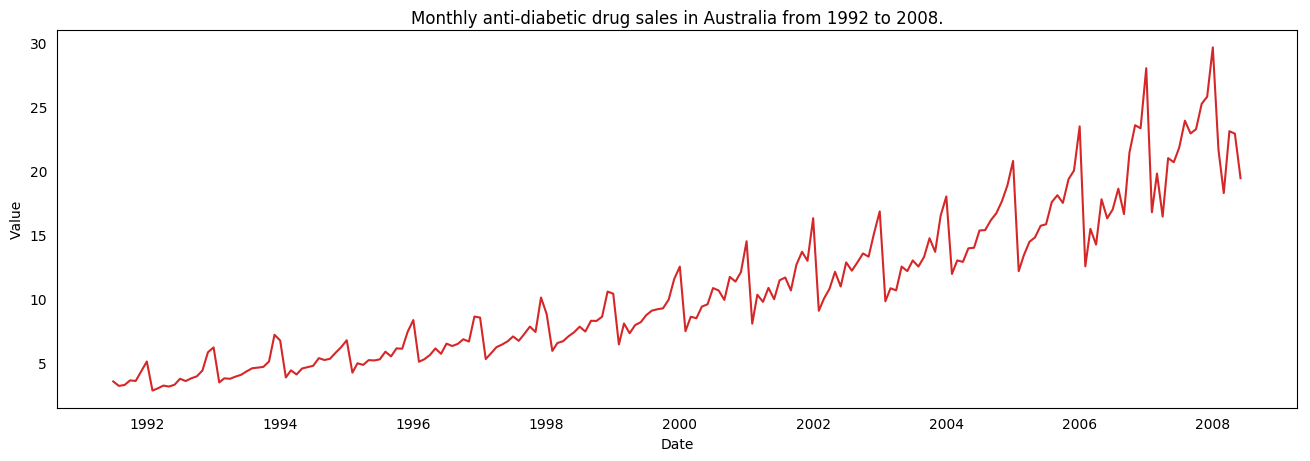

In [98]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.values, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')


In [19]:
np.min(long_ts.index)

Timestamp('2000-01-03 00:00:00')

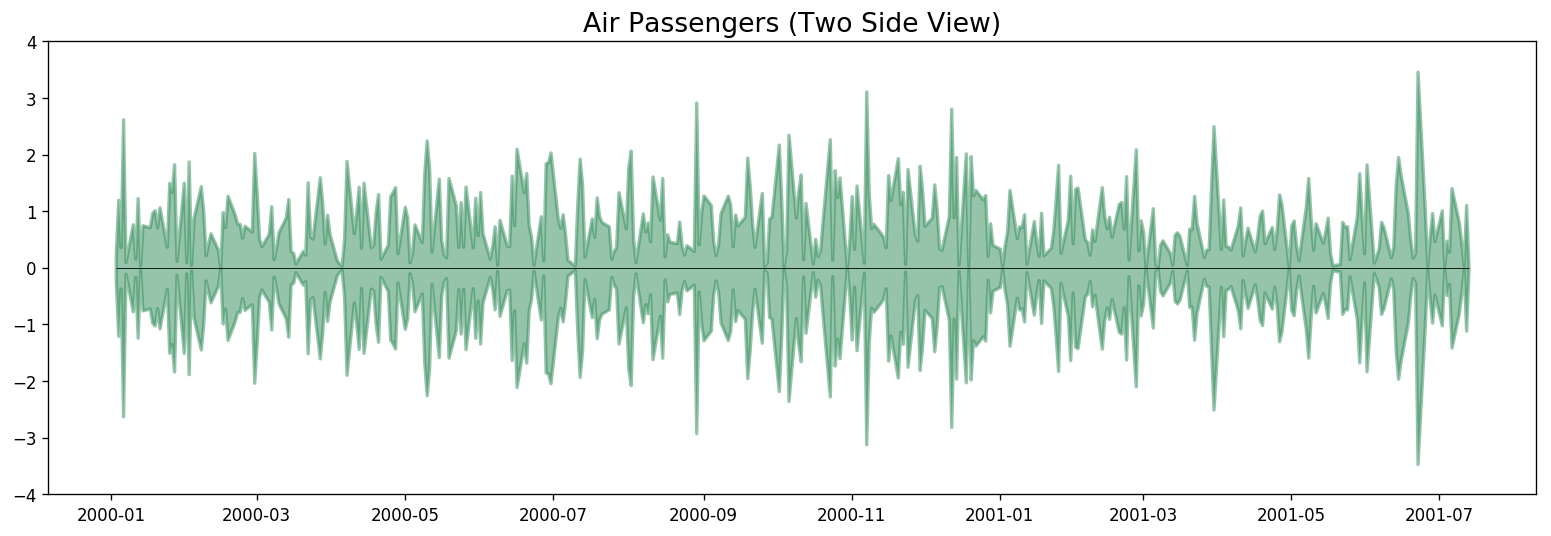

In [21]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(long_ts.index, y1=abs(long_ts.values), y2=-abs(long_ts.values), alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-4, 4)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(long_ts.index), xmax=np.max(long_ts.index), linewidth=.5)
plt.show()

## Series & Dataframe plot
https://mp.weixin.qq.com/s/ZIerdoTeqqgFo-6-lOmQRw

In [121]:
import tushare as ts
import pandas as pd

pd.set_option('expand_frame_repr', False)  # 显示所有列
pro = ts.pro_api('5fd1639100f8a22b7f86e882e03192009faa72bae1ae93803e1172d5')

In [122]:
df = pro.daily(ts_code='600115.SH')[['trade_date', 'close']]
df.sort_values('trade_date', inplace=True) 
df['trade_date'] = pd.to_datetime(df['trade_date'])
df.set_index('trade_date', inplace=True)
df.head()

,close
trade_date,
2002-04-23,4.90
2002-04-24,4.80
2002-04-25,4.80
2002-04-26,4.89
2002-04-29,5.00


### 单个时间序列

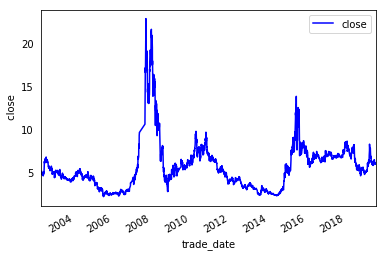

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = df.plot(color='b')
ax.set_xlabel('trade_date')
ax.set_ylabel(' close')
plt.show()

matplotlib库中有很多内置图表样式可以选择，通过打印plt.style.available查看具体都有哪些选项，应用的时候直接调用plt.style.use('fivethirtyeight')即可。

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


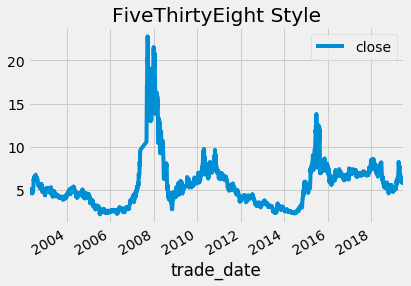

In [23]:
# print(plt.style.available)

# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']

# plt.style.use('fivethirtyeight')
# ax1 = df.plot()
# ax1.set_title('FiveThirtyEight Style')
# plt.show()

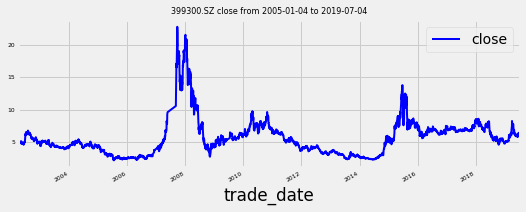

In [24]:
# ax = df.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)
# ax.set_title('399300.SZ close from 2005-01-04 to 2019-07-04', fontsize=8)
# plt.show()

如果想要突出图中的某一日期或者观察值，可以调用.axvline()和.axhline()方法添加垂直和水平参考线。

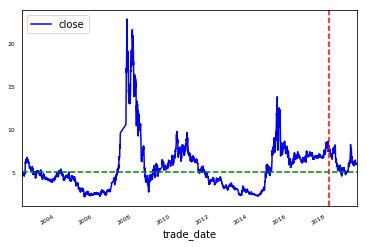

In [124]:
ax = df.plot(color='blue', fontsize=6)
ax.axvline('2018-03-01', color='red', linestyle='--')
ax.axhline(5, color='green', linestyle='--')
plt.show()

也可以调用axvspan()的方法为一段时间添加阴影标注，其中alpha参数设置的是阴影的透明度，0代表完全透明，1代表全色。

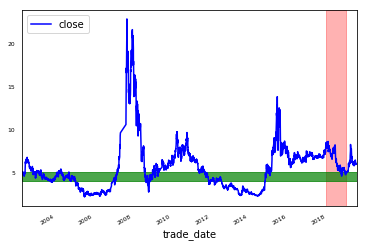

In [125]:
ax = df.plot(color='blue', fontsize=6)
ax.axvspan('2018-01-01', '2019-01-01', color='red', alpha=0.3)
ax.axhspan(4, 5, color='green', alpha=0.7)
plt.show()

### 移动平均时间序列
有时候，我们想要观察某个窗口期的移动平均值的变化趋势，可以通过调用窗口函数rolling来实现。下面实例中显示的是，以250天为窗口期的移动平均线close，以及与移动标准差的关系构建的上下两个通道线upper和lower。

In [126]:
ma = df.rolling(window=250).mean()
mstd = df.rolling(window=250).std()

ma['upper'] = ma['close'] + (mstd['close'] * 2)
ma['lower'] = ma['close'] - (mstd['close'] * 2)
ma.head()

,close,upper,lower
trade_date,,,
2002-04-23,NaN,NaN,NaN
2002-04-24,NaN,NaN,NaN
2002-04-25,NaN,NaN,NaN
2002-04-26,NaN,NaN,NaN
2002-04-29,NaN,NaN,NaN


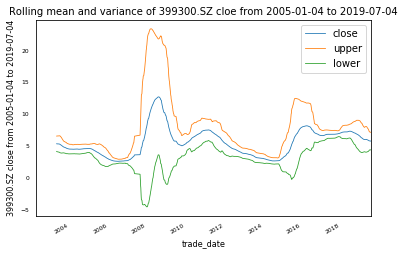

In [127]:
ax = ma.plot(linewidth=0.8, fontsize=6)
ax.set_xlabel('trade_date', fontsize=8)
ax.set_ylabel('399300.SZ close from 2005-01-04 to 2019-07-04', fontsize=8)
ax.set_title('Rolling mean and variance of 399300.SZ cloe from 2005-01-04 to 2019-07-04', fontsize=10)
plt.show()

### 多个时间序列

In [128]:
# 获取数据
code_list = ['000001.SZ', '000002.SZ', '600000.SH']
data_list = []
for code in code_list:
    print(code)
    df = pro.daily(ts_code=code, start_date='20180101', end_date='20190101')[['trade_date', 'close']]
    df.sort_values('trade_date', inplace=True)
    df.rename(columns={'close': code}, inplace=True)
    df.set_index('trade_date', inplace=True)
    data_list.append(df)
df = pd.concat(data_list, axis=1)
print(df.head())

000001.SZ
000002.SZ
600000.SH
            000001.SZ  000002.SZ  600000.SH
trade_date                                 
20180102        13.70      32.56      12.72
20180103        13.33      32.33      12.66
20180104        13.25      33.12      12.66
20180105        13.30      34.76      12.69
20180108        12.96      35.99      12.68


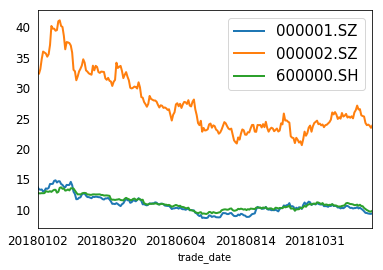

In [129]:
# 画图
ax = df.plot(linewidth=2, fontsize=12)
ax.set_xlabel('trade_date')
ax.legend(fontsize=15)
plt.show()

### Draw a stacked area plot.

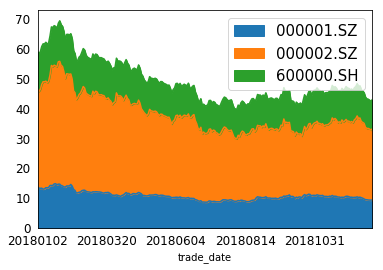

In [130]:
ax = df.plot.area(fontsize=12)
ax.set_xlabel('trade_date')
ax.legend(fontsize=15)
plt.show()

如果想要在不同子图中单独显示每一个时间序列，可以通过设置参数subplots=True来实现。layout指定要使用的行列数，sharex和sharey用于设置是否共享行和列，colormap='viridis' 为每条线设置不同的颜色。



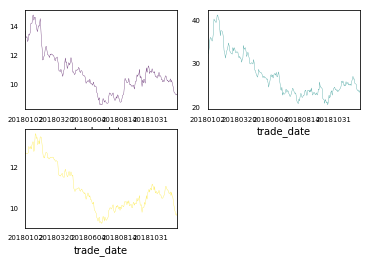

In [131]:
df.plot(subplots=True,
          layout=(2, 2),
          sharex=False,
          sharey=False,
          colormap='viridis',
          fontsize=7,
          legend=False,
          linewidth=0.3)

plt.show()

## 季节性时间序列的可视化

In [23]:
import matplotlib as mpl

In [31]:
# Import Data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
# df.to_pickle('data/df_a10.pkl')
df = pd.read_pickle('data/df_a10.pkl')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [32]:
df.reset_index(inplace=True)
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
df.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


Text(0.5, 1.0, 'Seasonal Plot of Drug Sales Time Series')

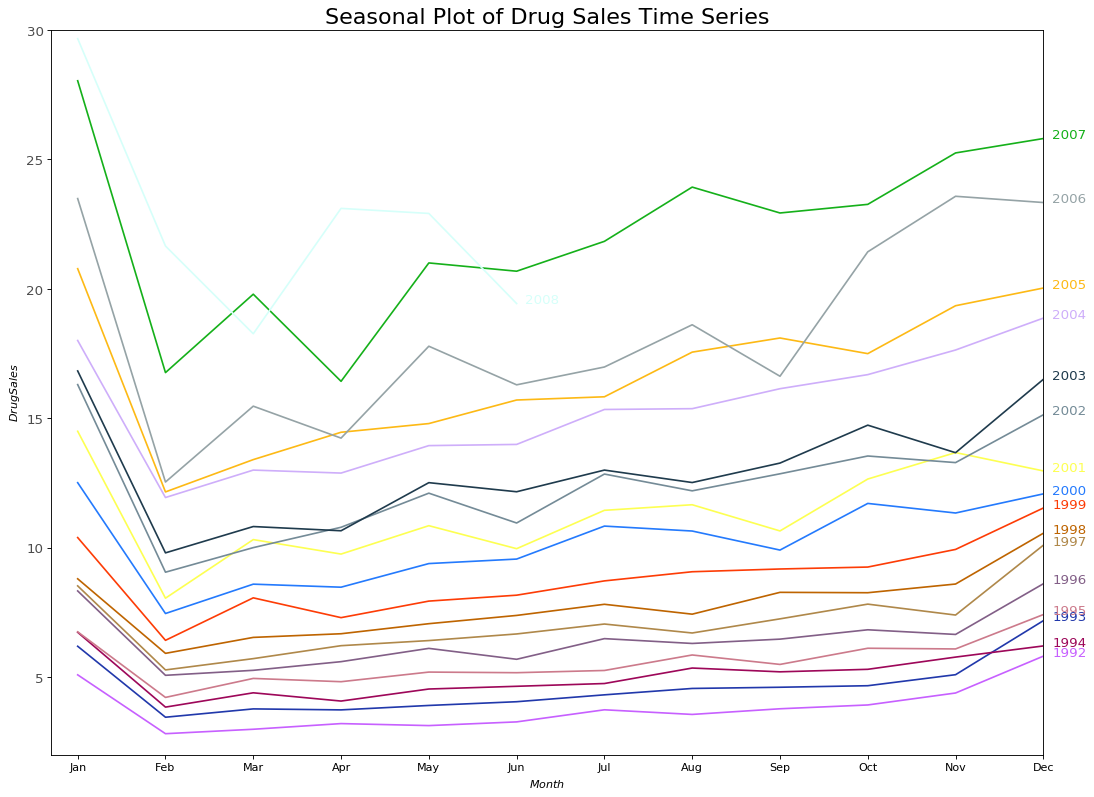

In [24]:
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)

每年的二月份，药品销售会有一次大幅度下跌，三月份会回涨，四月份再次下跌，以此规律循环。很明显，该模式以年为单位，每年循环往复。

 

不过，随着年份的变化，药品销售总体呈上升趋势。你可以选择使用箱型图将这一趋势进行可视化，可以方便看出每一年的变化。同样地，你也可以按月份绘制箱型图，来观察每个月的变化。

## 按月份（季节）和年份绘制箱型图：

In [33]:
df = pd.read_pickle('data/df_a10.pkl')
df.reset_index(inplace=True)

In [35]:
import seaborn as sns

Text(0.5, 1.0, 'Month-wise Box Plot\n(The Seasonality)')

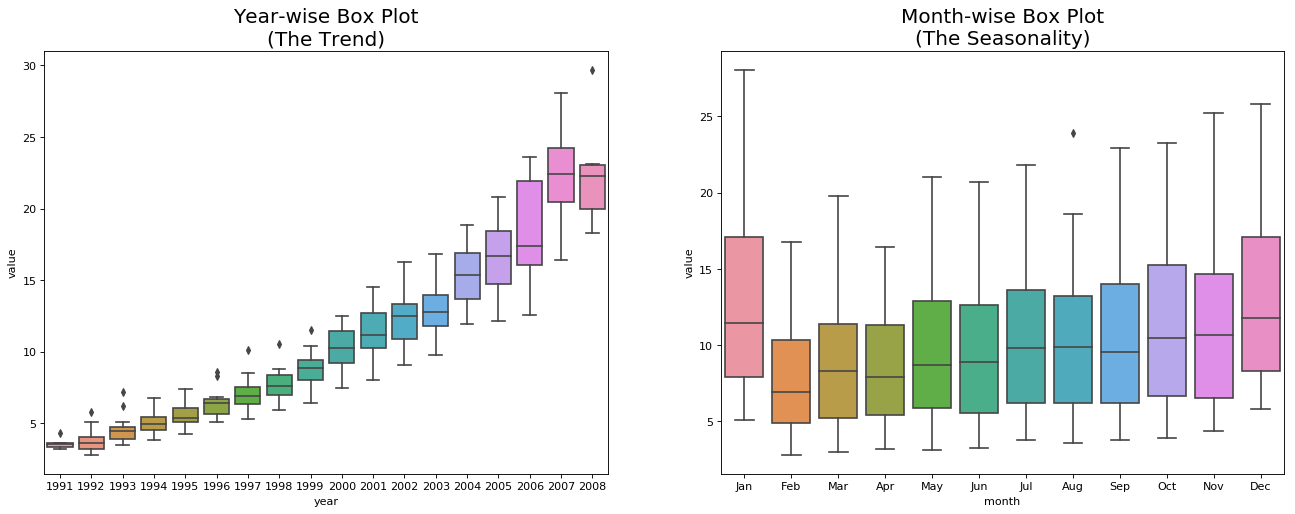

In [36]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

## 时间序列的模式

任何一个时间序列都可以被分解成以下几个部分：基准 + 趋势成分 + 季节成分 + 残差成分。  

趋势是指时间序列中上升或下降的倾斜程度。但季节成分是由于受季节因素影响而产生的周期性模式循环，也可能受每年内不同月份、每月内不同日期、工作日或周末，甚至每天内不同时间的影响。

 

然而，不一定所有的时间序列都具备趋势或季节性。一个时间序列也可能不存在趋势，但具有季节性。反之亦然。

 

因此，一个时间序列可以被想象成趋势、季节性和残差项的组合。

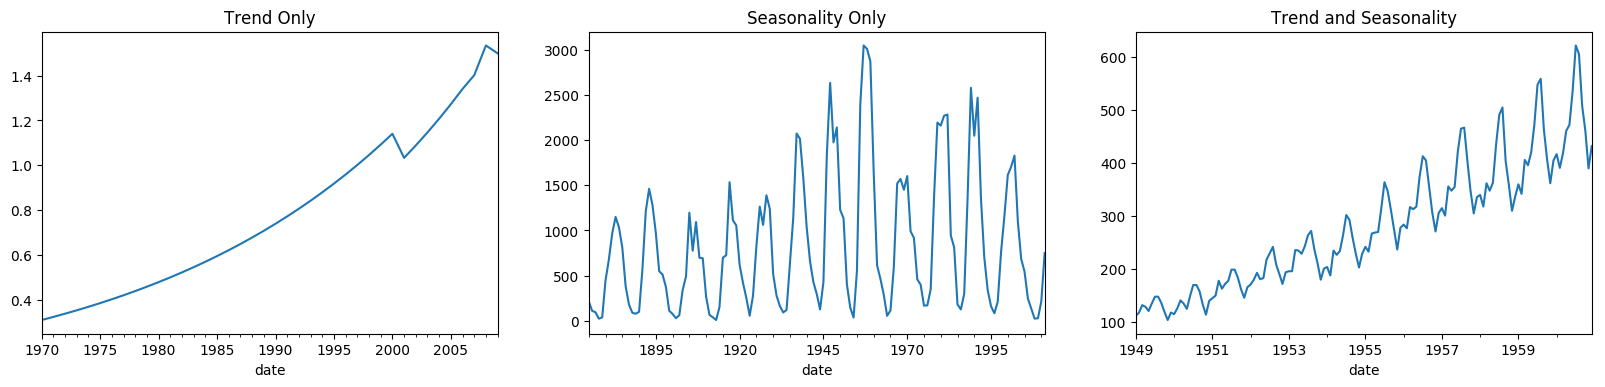

In [38]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

## 加法与乘法时间序列

根据趋势和季节的固有属性，一个时间序列可以被建模为加法模型或乘法模型，也就是说，序列中的值可以用各个成分的加和或乘积来表示：

 

加法时间序列：

值 = 基准 + 趋势 + 季节 + 残差

 

乘法时间序列：

值 = 基准 x 趋势 x 季节 x 残差

## 如何将时间序列的成分分解出来？

通过将一个时间序列视为基准、趋势、季节指数及残差的加法或乘法组合，你可以对时间序列进行经典分解。


statsmodels 的 seasonal_decompose 函数可以使这一过程非常容易。

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_pickle('data/df_a10.pkl')

In [41]:
# Multiplicative Decomposition 乘法分解
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

In [42]:
# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

Text(0.5, 0.98, 'Additive Decompose')

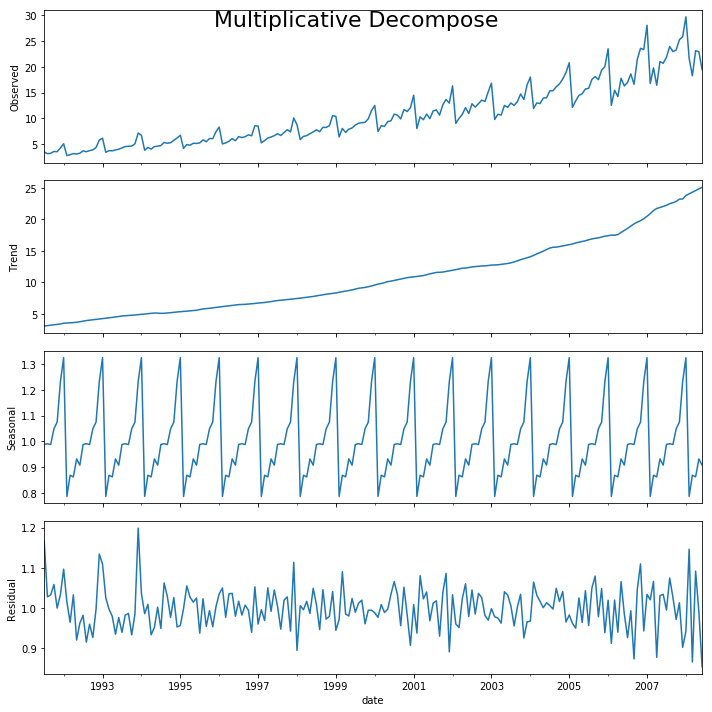

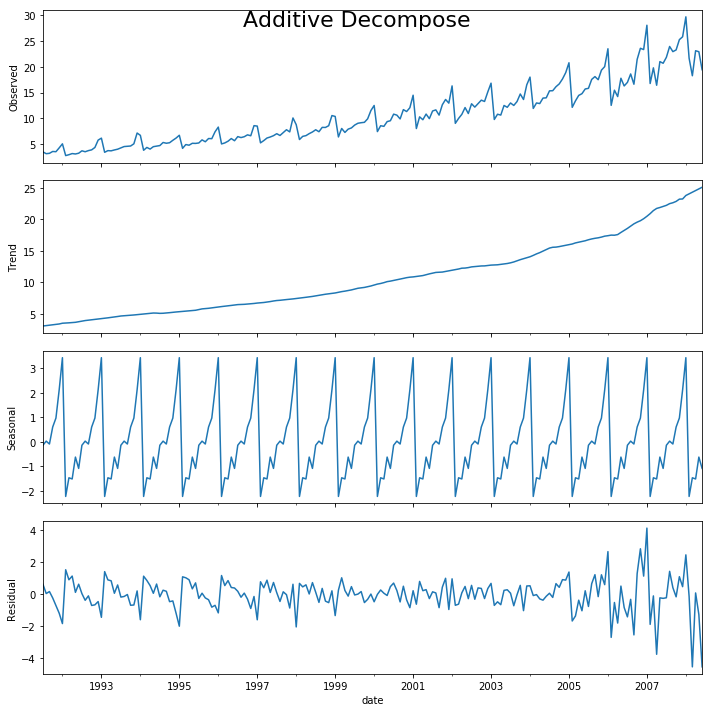

In [43]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)

设置 extrapolate_trend='freq' 有助于处理序列首部趋势和残差中的空值。

 

如果你仔细观察加法分解中的残差项，会发现其中仍保留了一些模式。然而，乘法分解中的残差项看起来更具有随机性。因此，对于这一特定序列来说，采用乘法分解更合适。

 

趋势、季节和残差成分的数值输出均存储在 result_mul 里，下面我们对其进行提取，并放入数据框中：  
仔细观察，会发现 seas、trend 和 resid 三列的乘积正好等于 actual_values。

In [44]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


# 平稳和非平稳时间序列

## 时间序列平稳性

平稳性就是要求经由样本时间序列所得到的拟合曲线在未来一段时间内仍能顺着现有的形态惯性地延续下去。平稳性要求序列的均值和方差不发生明显变化。  

### 严平稳
严平稳表示的分布不随时间的改变而改变。如白噪声(正太),无论怎么取，都是期望为0，方差为1

### 宽平稳
期望与相关系数(依赖性)不变。未来某时刻的t的值Xt就要依赖于它的过去信息，所以需要依赖性。这种依赖性不能有明显的变化。
 

平稳的时间序列也不包括季节因素的影响。那么如何分辨一个序列是否平稳呢？让我们来看几个例子：

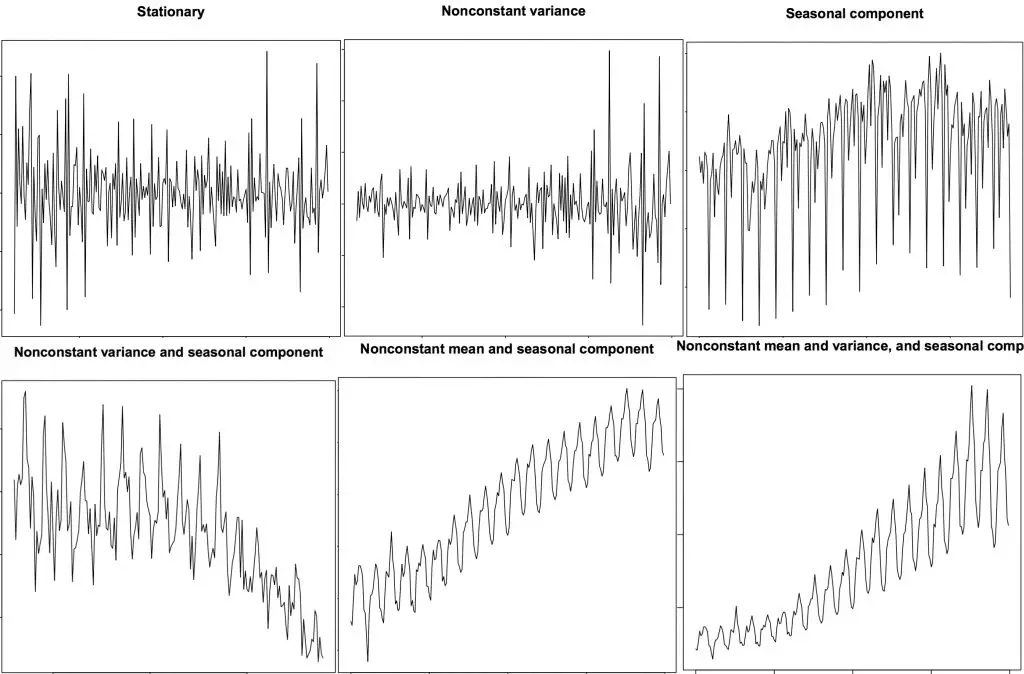

## 为什么说序列平稳很重要呢？

 

我会对此稍微做一些解释，但要清楚一点，通过采用合适的变换，我们近乎可以将任何时间序列变得平稳。大多数统计预测方法最初都是为平稳时间序列而设计的。预测过程的第一步是通过一些变换，来将非平稳序列变成平稳序列。

## 如何将时间序列变平稳？

你可以通过以下几种方式得到平稳序列：



* 求序列的差分

* 求序列的 log 值

* 求序列的 n 次方根

把上面三种方法相结合



将时间序列平稳化最普遍且便捷的方法是对序列进行差分运算，至少执行一次，直到序列趋于平稳。

 

### 那么什么是差分呢？

 

如果 Y_t 为时间 't' 对应的值，那么第一个差分值为 Y = Yt – Yt-1。简单来说，对序列进行差分运算就是用下一个值减去当前值。如果第一次差分不能使序列平稳，你可以尝试做第二次差分，直到符合要求。

 

举个例子，有这样一个序列：[1, 5, 2, 12, 20]

 

第一次差分运算的结果为：[5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

 

第二次差分运算的结果为：[-3-4, -10-3, 8-10] = [-7, -13, -2]

## 为什么要在预测前将非平稳序列变平稳？

对平稳序列进行预测要相对容易一些，预测结果也更可信。其中一个重要原因是，自回归预测模型本质上是线性回归模型，将序列自身的滞后作为预测因子。

 

如果预测因子之间互不相关，线性回归的效果最优。那么将序列平稳化就可以解决这一问题，因为它可以去除任何持久的自相关性，所以可以使预测模型中的预测因子近乎独立。

 

现在我们知道了使序列平稳化的重要性，那么应该如何检查一个序列是否平稳呢？

## 如何测试平稳性？

我们可以像之前那样，通过绘制序列图来观察一个序列是否平稳。

 

另一种方法是将序列分解成两个或多个连续的部分，并求其统计值，如平均值、方差和自相关系数。如果这些统计值间的差异很大，那么该序列大概率不是平稳序列。

### 单位根检验

尽管如此，你仍需要一种方法来定量地判断某个序列是否平稳。一个名为“单位根检验”的统计检验方法可以解决这一问题。

 

单位根检验有如下几种方法：



* ADF Test (Augmented Dickey Fuller test)

* KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin) — 趋势平稳

* PP Test (Philips Perron test)


#### ADF test
最常用的方法是 ADF test，零假设为：用时间序列对单位根进行处理，结果是不平稳。如果 P 值小于显著性水平 0.05，则拒绝零假设，即不成立。

 
#### KPSS test
另一方面，KPSS test 可用来检测趋势平稳性。零假设与 P 值含义都与 ADH test 相反。以下代码基于 Python 的 statsmodels 包执行了两种检测方法：

In [45]:
from statsmodels.tsa.stattools import adfuller, kpss

In [46]:
df = pd.read_pickle('data/df_a10.pkl')

In [47]:
# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.14518568930674
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [49]:
# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


## 白噪声与平稳序列的差别是什么？

和平稳序列一样，白噪声也是关于时间的函数，它的均值和方差始终不变。但区别在于，白噪声是完全随机的，且均值为零。

 

白噪声没有任何模式。如果你把调频广播的声波讯号想象成时间序列，调频道时的空白声音就是白噪声。

 

从数学上来讲，一个完全随机且均值为零的序列就是白噪声。

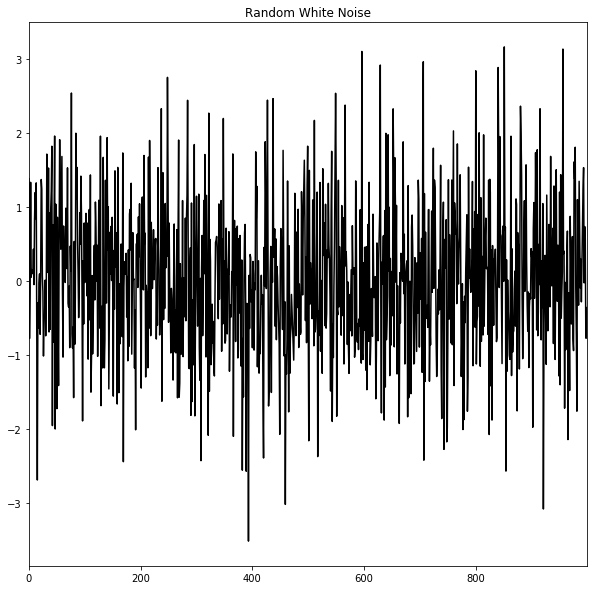

In [50]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')

## 如何对时间序列去趋势？

对时间序列去趋势，是指去除序列中的趋势成分。但要如何提取趋势成分呢？有以下几种方法：



* 减去与时间序列拟合程度最好的曲线。这条最优曲线可由线性回归模型获得，时间步长作为预测因子。如需处理更复杂的趋势，你可以尝试在模型中使用二次项 (x^2)。

* 减去由时间序列分解得到的趋势成分。

* 减去均值。

* 使用过滤器，如 Baxter-King (statsmodels.tsa.filters.bkfilter) 或 Hodrick-Prescott (statsmodels.tsa.filters.hpfilter)，来去除移动平均趋势线或周期性成分。



下面我们来执行这两种方法：

In [51]:
from scipy import signal

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:2535: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  coef, resids, rank, s = linalg.lstsq(A, newdata[sl])


Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

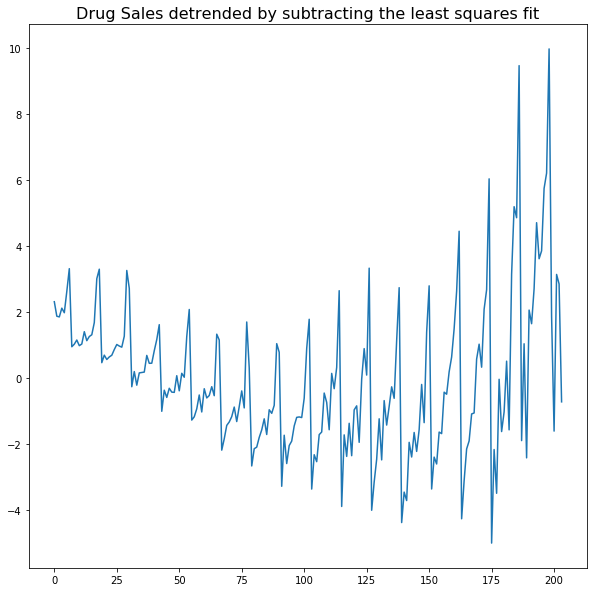

In [52]:
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

In [53]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

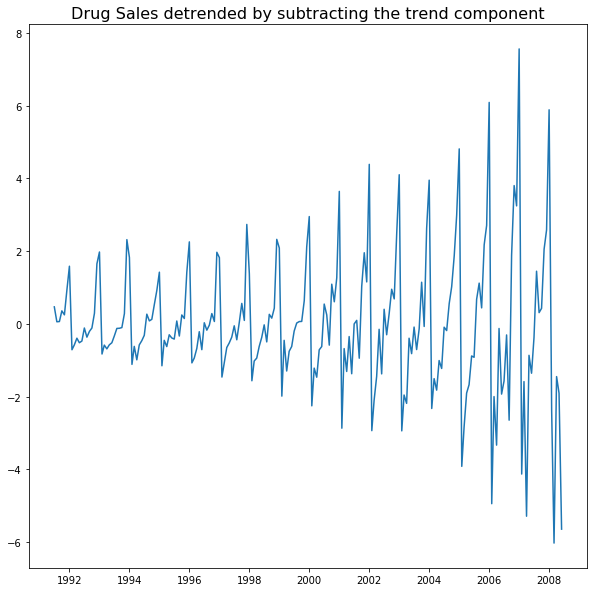

In [54]:
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

## 如何对时间序列去季节性？

对时间序列去季节性同样有多种方法，如下：



* 把特定长度的移动平均值作为季节窗口。

* 对序列做季节性差分（用当前值减去上个季度的值）。

* 用当前序列除以由 STL 分解得到的季节指数。



若除以季节指数的效果不好，可以尝试取序列的对数，然后对其去季节。之后你可以通过指数运算来恢复原来的值。

Text(0.5, 1.0, 'Drug Sales Deseasonalized')

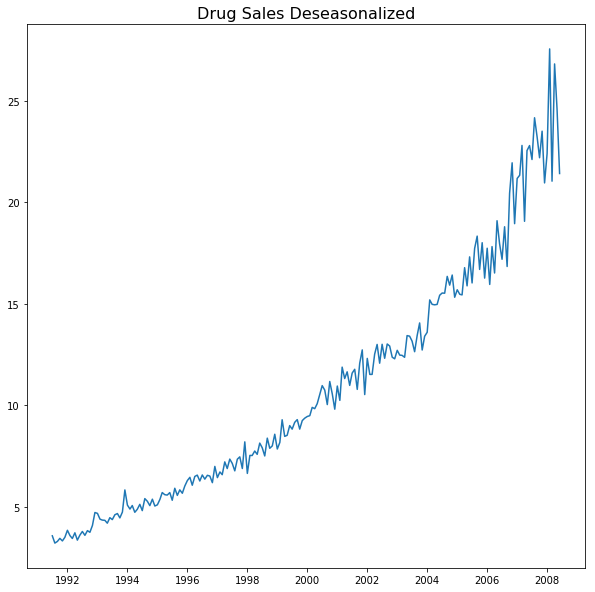

In [55]:
# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)

## 如何检测时间序列的季节性？

一般方法是画出序列图，观察固定的时间间隔是否有重复模式出现。因此，季节性的类型由时钟或日历决定：



* 一天中的小时

* 月份中的日期

* 星期

* 月份

* 年份



不过，如果你想对季节性做一个明确的检验，可以使用自相关函数 (ACF) 图，接下来的部分会做相关详细介绍。当季节模式明显时，ACF 图中季节窗口的整数倍处会反复出现特定的尖峰。

 

例如，药品销售的时间序列是月份序列，每年会出现重复的模式，你会在第 12、24、36 个序列值处看到尖峰。

 

必须要提醒你的是，现实生活中的数据集很少会出现特别明显的模式，可能会被一些噪声污染，所以需要更加仔细观察其中的模式。

In [56]:
from pandas.plotting import autocorrelation_plot

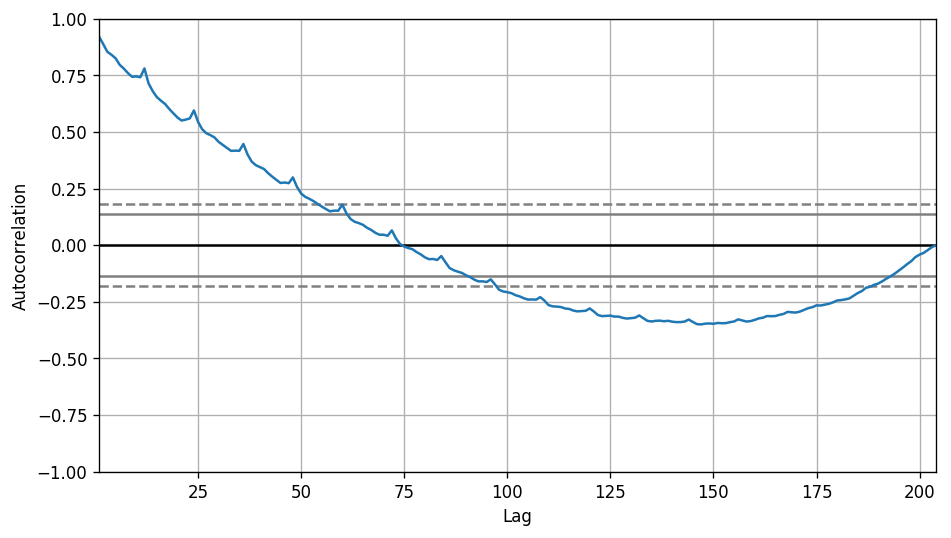

In [57]:
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

## 如果处理时间序列中的缺失值？

有时候，时间序列中会出现缺失的值或日期。这意味着，某些数据没有获取到，或者无法对这些时间段进行观测。也可能那些时间的测量值本身为零，这种情况下你只需对其填充零。

 

第二种情况，你不应该直接用序列的均值对缺失处进行填充，尤其当该序列不是平稳序列时。比较暴力但有效的解决方法是用前一个值来填充缺失处。

 

根据序列的内在属性，你可以尝试多种方法。以下是几种比较有效的填充方法：



* 向后填充法

* 线性插值法

* 二次插值法

* 最近邻均值法

* 季节均值法



为了评估缺失值的填充效果，我在时间序列中手动加入缺失值，用以上几种方法对其进行填充，然后计算填充后的序列与原序列的均方误差。 

In [58]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

In [82]:
df = pd.read_pickle('data/df_a10.pkl')
df_orig = df.head(100).copy()
df = df.head(100).copy()

In [83]:
df.loc[df_orig.sample(50).index] = None
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,NaN
1991-11-01,NaN


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: Mean of empty slice


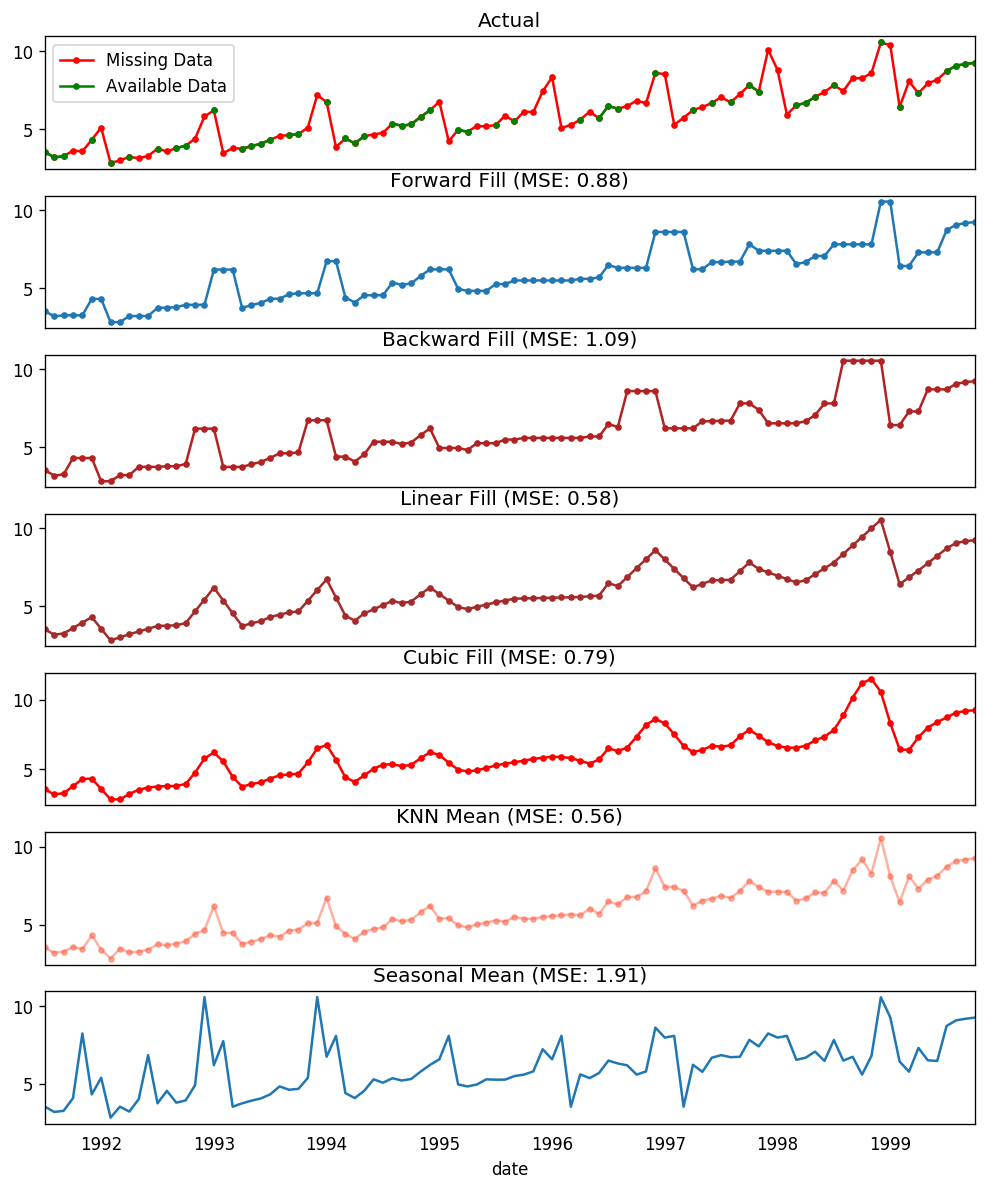

In [84]:
fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")


## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")")

## 什么是自相关和偏自相关函数？

In [79]:
df = df_missing

简单来说，自相关就是一个序列的值与自己本身具有相关性。如果一个序列呈现显著自相关，意味着序列的前一个值可用于预测当前值。

 

偏自相关也传达了类似的信息，但更偏重于序列与自身滞后序列的相关性，消除了由于较短滞后所导致的任何相关性。

In [85]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [86]:
df = pd.read_pickle('data/df_a10.pkl')

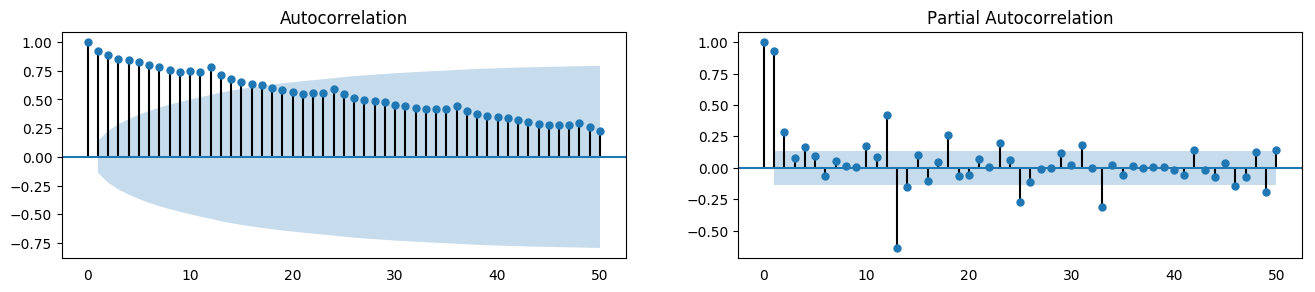

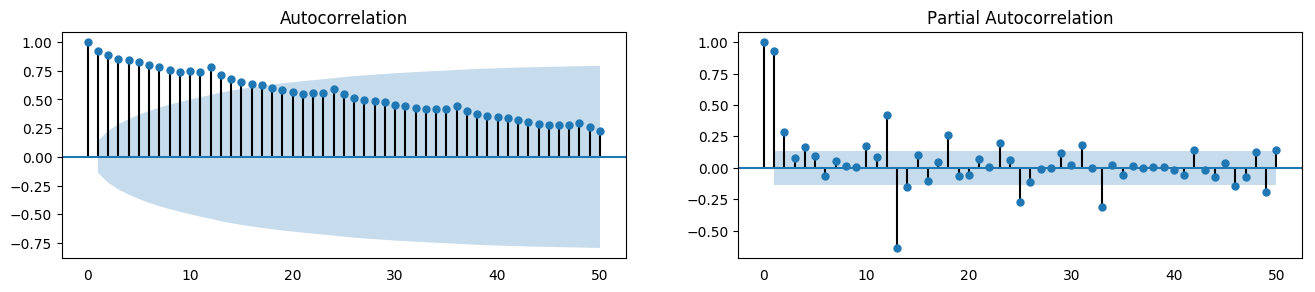

In [87]:
# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

## 如何计算偏自相关系数？

序列滞后 k 处的偏自相关系数是 Y 的自回归方程的滞后系数。Y 的自回归方程是指 Y 以自己的滞后作为预测因子的线性回归。

 

举个例子，如果 Y_t 为当前序列，Y_t-1 即为滞后期为 1 的 Y 值，那么滞后期为 3 处 (Y_t-3) 的偏自相关系数是下面方程中的 α3：

自回归方程
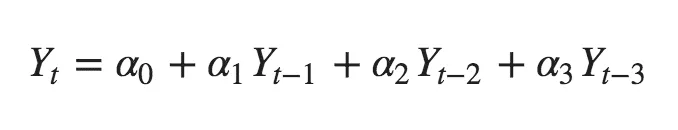

## 滞后图

滞后图是时间序列与自身滞后的分布图，通常用来检验自相关性。如果序列中出现下图中的模式，那么说明该序列具有自相关性。如果没有出现这些模型，该序列很可能为随机白噪声。

 

在下面太阳黑子区的例子中，随着滞后期的增长，图中的点越来越分散。

Text(0.5, 1.05, 'Lag Plots of Drug Sales')

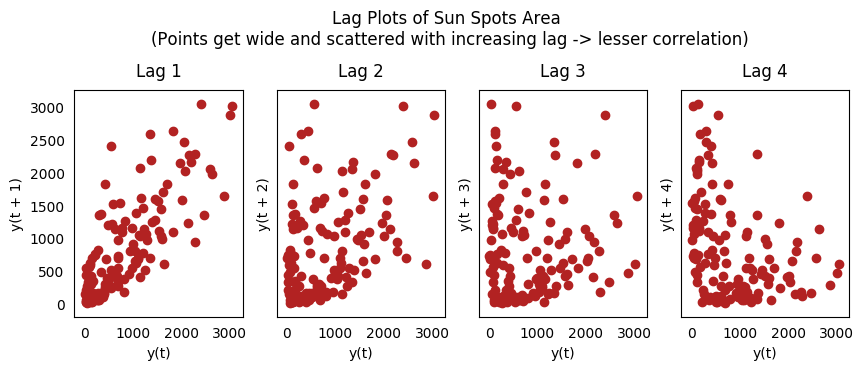

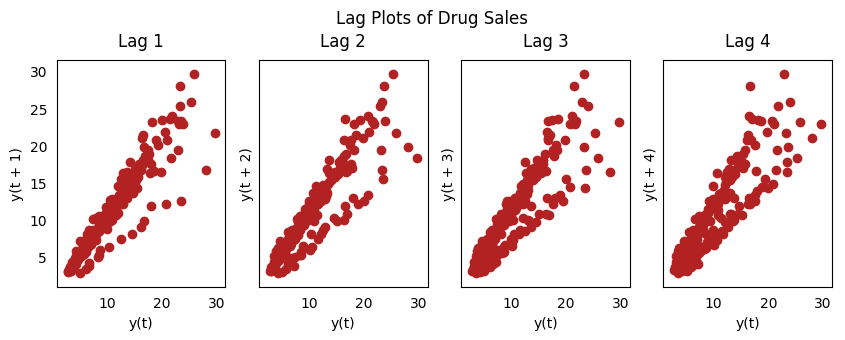

In [88]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_pickle('data/df_a10.pkl')

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)

## 如何评估时间序列的可预测性？

一个时间序列的模式越有规律，就越容易预测。可以用近似熵来量化时间序列的规律性和波动的不可预测性。

 

近似熵越高，意味着预测难度越大。

 

另一个选择是样本熵。

 

样本熵与近似熵类似，但在不同的复杂度上更具有一致性，即使是小型时间序列。例如，相比于“有规律”的时间序列，一个数据点较少的随机时间序列的近似熵较低，但一个较长的随机时间序列却有较高的近似熵。

 

因此，样本熵更适于解决该问题。

In [89]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(ss.value, m=2, r=0.2*np.std(ss.value)))     # 0.651
print(ApEn(a10.value, m=2, r=0.2*np.std(a10.value)))   # 0.537
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0. 

0.6514704970333534
0.5374775224973489
0.12944610439759563
0.7700178970365532


In [90]:
# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(ss.value, m=2, r=0.2*np.std(ss.value)))      # 0.78
print(SampEn(a10.value, m=2, r=0.2*np.std(a10.value)))    # 0.41
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.

0.7853311366380039
0.41887013457621214
inf
1.7841548698428358


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


## 为什么要对时间序列做平滑处理？如果操作？

对时间序列做平滑处理有以下几个用处：



* 减少噪声影响，从而得到过滤掉噪声的、更加真实的序列。

* 平滑处理后的序列可用作特征，更好地解释序列本身。

* 可以更好地观察序列本身的趋势。



那么如果进行平滑处理呢？现讨论以下几种方法：



* 取移动平均线

* 做 LOESS 平滑（局部回归）

* 做 LOWESS 平滑（局部加权回归）



移动平均是指对一个滚动的窗口计算其平均值，该窗口的宽度固定不变。但你必须谨慎选择窗口宽度，因为窗口过宽会导致序列平滑过度。例如，如果窗口宽度等于季节长度，就会消除掉季节因素的作用。

 

LOESS 是 LOcalized regrESSion 的缩写，该方法会在每个点的局部近邻点做多次回归拟合。此处可以使用 statsmodels 包，你可以使用参数 frac 控制平滑程度，即决定周围多少个点参与回归模型的拟合。

Text(0.5, 0.95, 'How to Smoothen a Time Series')

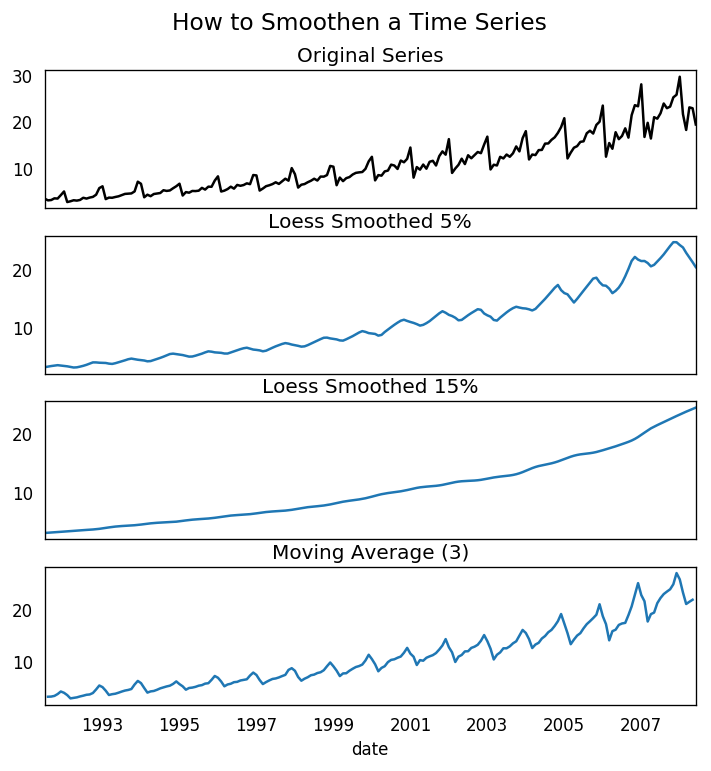

In [92]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = df

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)

## 如何用格兰杰因果关系检验判断一个时间序列是否可以预测另一个？

In [91]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


格兰杰因果关系检验可用作检测一个时间序列是否可以用来预测另一个序列。那么格兰杰因果关系检验是如何进行运算的呢？

 

该检验基于一个假设，即 X 导致了 Y 的发生，那么基于 Y 的先前值与 X 的先前值得到的 Y 的预测值，要优于仅根据 Y 本身得到的预测值。

 

statsmodels 包提供了便捷的检验方法。它可以接受一个二维数组，其中第一列为值，第二列为预测因子。

 

零假设为：第二列的序列与第一列不存在格兰杰因果关系。如果 P 值小于显著性水平 0.05，就可以拒绝零假设，从而知道 X 的滞后是起作用的。

 

第二个参数 maxlag 表示该检验中涉及了 Y 的多少个滞后期。

In [96]:
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_pickle('data/df_a10.pkl')
df['month'] = df.index.month
grangercausalitytests(df[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.7796748355736, 3.661425871353102e-12, 200.0, 1),
   'ssr_chi2test': (55.6013699581072, 8.876175235021508e-14, 1),
   'lrtest': (49.14260233004984, 2.38014300604565e-12, 1),
   'params_ftest': (54.77967483557335, 3.661425871353419e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.69891799873236, 1.9133235086857257e-42, 197.0, 2),
   'ssr_chi2test': (333.65666432227346, 3.5267600881280646e-73, 2),
   'lrtest': (196.99559277182186, 1.6709003499116746e-43, 2),
   'params_ftest': (162.69891799873227, 1.9133235086857535e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

在上面的例子中，全部测试结果中的 P 值都为零，说明 'month' 可用作预测航班的乘客数量。



In [94]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


# 时间序列预测模型-ARIMA原理及Python实现！

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
ChinaBank = pd.read_csv('data/ChinaBank.csv',index_col = 'Date',parse_dates=['Date'])
ChinaBank.head()

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2014-01-02,1,2.62,2.62,2.59,2.61,41632500
2014-01-03,2,2.60,2.61,2.56,2.56,45517700
2014-01-06,3,2.57,2.57,2.50,2.53,68674700
2014-01-07,4,2.51,2.52,2.49,2.52,53293800
2014-01-08,5,2.51,2.54,2.49,2.51,69087900


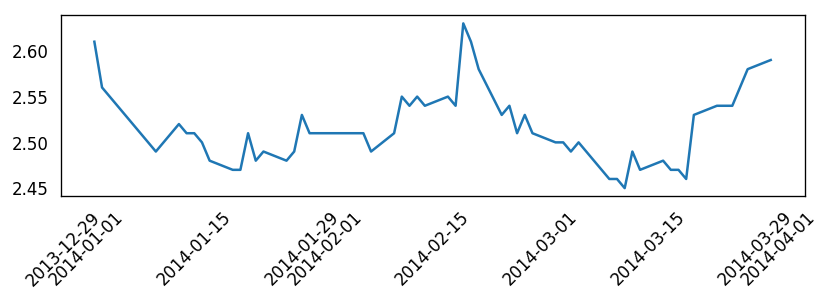

In [110]:
sub = ChinaBank['2014-01':'2014-06']['Close']
train = sub.loc['2014-01':'2014-03']
test = sub.loc['2014-04':'2014-06']
plt.figure(figsize=(8, 2))
plt.plot(train)
plt.xticks(rotation=45)
plt.show()

In [111]:
ChinaBank['Close_diff_1'] = ChinaBank['Close'].diff(1)
ChinaBank['Close_diff_2'] = ChinaBank['Close_diff_1'].diff(1)
ChinaBank.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Close_diff_1,Close_diff_2
Date,,,,,,,,
2014-01-02,1,2.62,2.62,2.59,2.61,41632500,NaN,NaN
2014-01-03,2,2.60,2.61,2.56,2.56,45517700,-0.05,NaN
2014-01-06,3,2.57,2.57,2.50,2.53,68674700,-0.03,2.000000e-02
2014-01-07,4,2.51,2.52,2.49,2.52,53293800,-0.01,2.000000e-02
2014-01-08,5,2.51,2.54,2.49,2.51,69087900,-0.01,-4.440892e-16


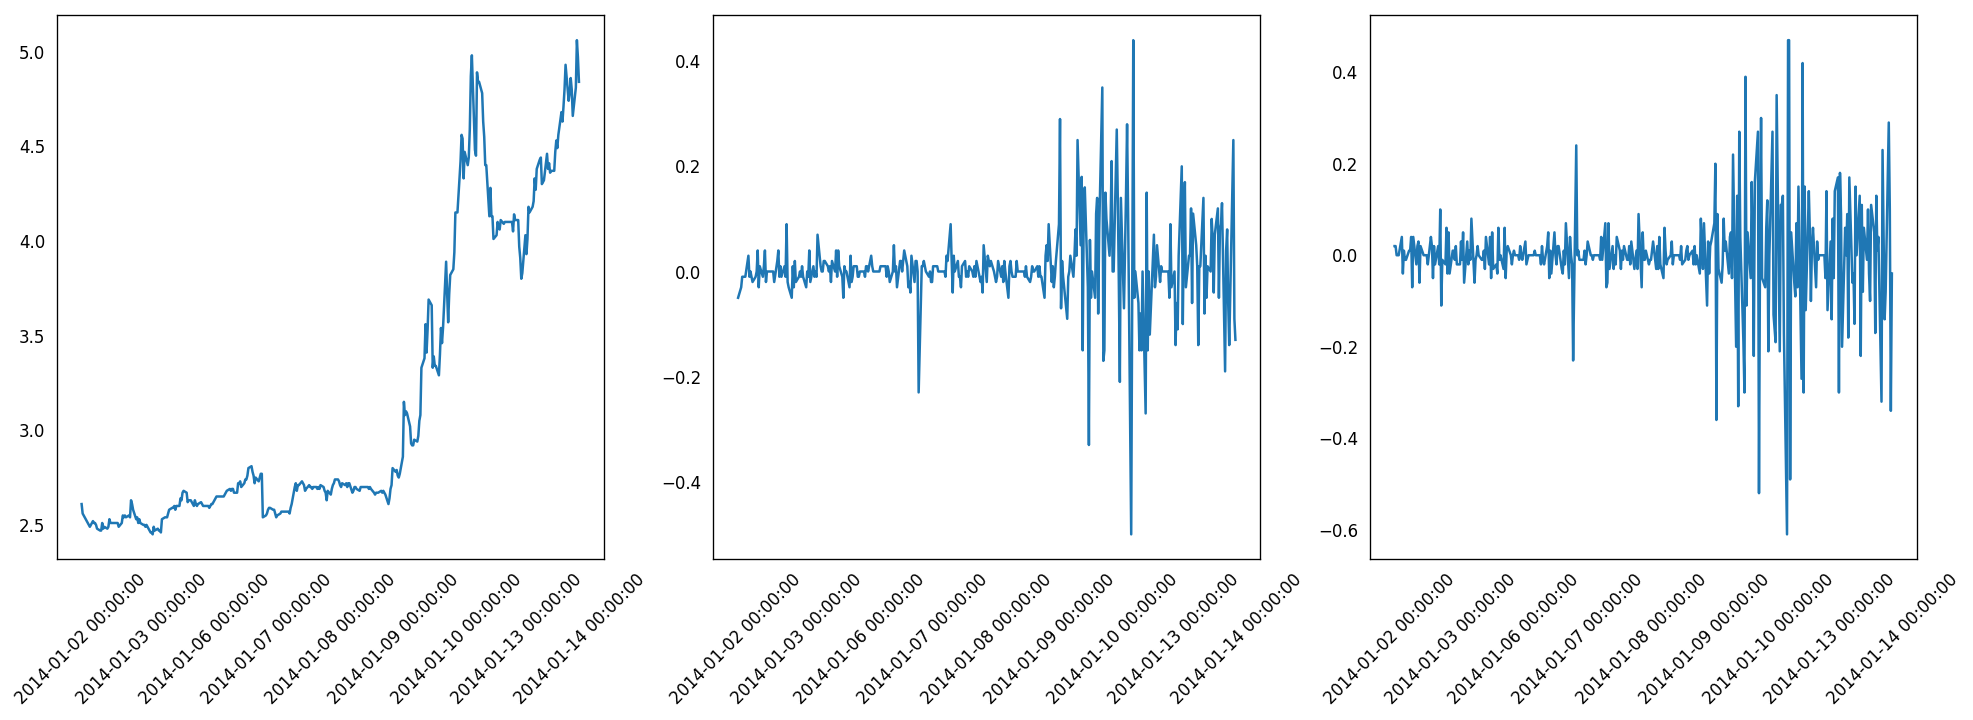

In [117]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax1.plot(ChinaBank['Close'])
ax1.set_xticklabels(ChinaBank.index, rotation=45)
ax2 = fig.add_subplot(132)
ax2.plot(ChinaBank['Close_diff_1'])
ax2.set_xticklabels(ChinaBank.index, rotation=45)
ax3 = fig.add_subplot(133)
ax3.plot(ChinaBank['Close_diff_2'])
ax3.set_xticklabels(ChinaBank.index, rotation=45)
plt.show()

可以看到，基本上时间序列在一阶差分的时候就已经接近于平稳序列了。

## ARIMA模型介绍
### 自回归模型AR
自回归模型描述当前值与历史值之间的关系，用变量自身的历史时间数据对自身进行预测。自回归模型必须满足平稳性的要求。

自回归模型首先需要确定一个阶数p，表示用几期的历史值来预测当前值。p阶自回归模型的公式定义为：

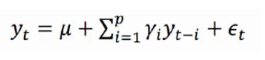

上式中yt是当前值,u是常数项,p是阶数 ri是自相关系数,et是误差。

自回归模型有很多的限制：  
1. 自回归模型是用自身的数据进行预测
1. 时间序列数据必须具有平稳性
1. 自回归只适用于预测与自身前期相关的现象

### 移动平均模型MA
移动平均模型关注的是自回归模型中的误差项的累加 ，q阶自回归过程的公式定义如下：

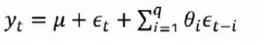

移动平均法能有效地消除预测中的随机波动。

### 自回归移动平均模型ARMA
自回归模型AR和移动平均模型MA模型相结合，我们就得到了自回归移动平均模型ARMA(p,q)，计算公式如下：

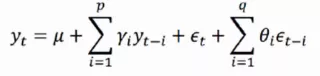

### 差分自回归移动平均模型ARIMA
将自回归模型、移动平均模型和差分法结合，我们就得到了差分自回归移动平均模型ARIMA(p,d,q)，其中d是需要对数据进行差分的阶数。

## 建立ARIMA模型的过程
一般来说，建立ARIMA模型一般有三个阶段，分别是模型识别和定阶、参数估计和模型检验，接下来，我们一步步来介绍：

### 模型识别和定阶
模型的识别问题和定阶问题，主要是确定p，d，q三个参数，差分的阶数d一般通过观察图示，1阶或2阶即可。这里我们主要介绍p和q的确定。我们首先介绍两个函数。

#### 自相关函数ACF(autocorrelation function)
自相关函数ACF描述的是时间序列观测值与其过去的观测值之间的线性相关性。计算公式如下：
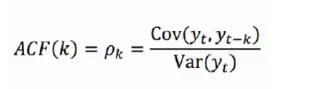

其中k代表滞后期数，如果k=2，则代表yt和yt-2

#### 偏自相关函数PACF(partial autocorrelation function)
偏自相关函数PACF描述的是在给定中间观测值的条件下，时间序列观测值预期过去的观测值之间的线性相关性。

举个简单的例子，假设k=3，那么我们描述的是yt和yt-3之间的相关性，但是这个相关性还受到yt-1和yt-2的影响。PACF剔除了这个影响，而ACF包含这个影响。

#### 拖尾和截尾
拖尾指序列以指数率单调递减或震荡衰减，

截尾指序列从某个时点变得非常小：
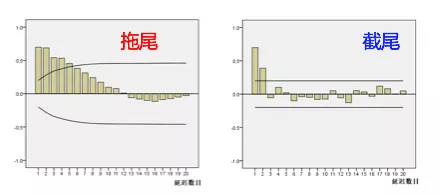

出现以下情况，通常视为(偏)自相关系数d阶截尾：
1. 在最初的d阶明显大于2倍标准差范围
1. 之后几乎95%的(偏)自相关系数都落在2倍标准差范围以内
1. 且由非零自相关系数衰减为在零附近小值波动的过程非常突然

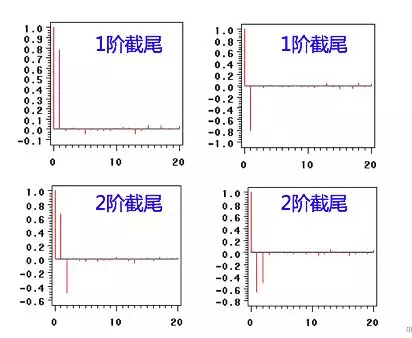

出现以下情况，通常视为(偏)自相关系数拖尾：
1. 如果有超过5%的样本(偏)自相关系数都落入2倍标准差范围之外
1. 或者是由显著非0的(偏)自相关系数衰减为小值波动的过程比较缓慢或非常连续。

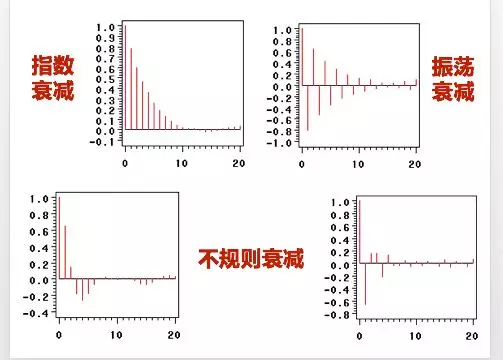

#### p，q阶数的确定
根据刚才判定截尾和拖尾的准则，p，q的确定基于如下的规则：  
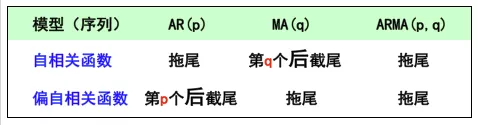

根据不同的截尾和拖尾的情况，我们可以选择AR模型，也可以选择MA模型，当然也可以选择ARIMA模型。接下来，我们就来画一下我们数据的拖尾和截尾情况:

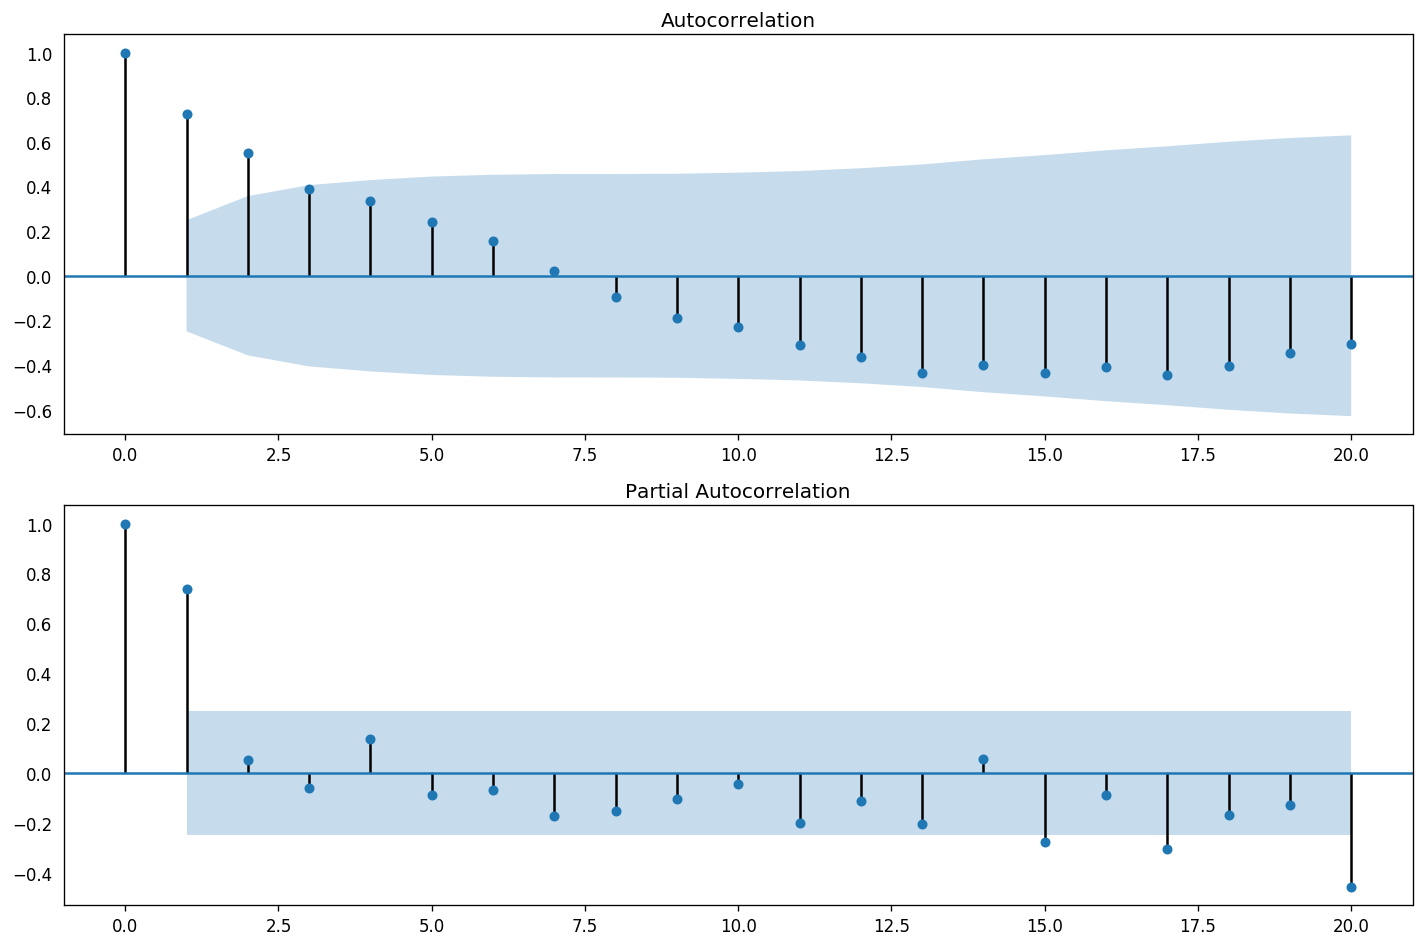

In [120]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()